In [73]:
import os
import pandas as pd
from docx import Document

In [75]:
# Dossier contenant les fichiers Word
folder_path = "C:/Users/peprc/Downloads/Memoire CEFORP OdileTCHATCHABLOUCOU/INTERVIEWABPFCLEAN/TEST_ABPF"

In [77]:
# Variables à extraire (sous-titres des sections)
variables = ['Q1.1', 'Q1.2','Q1.3','Q1.4','Q1.5','Q1.6','Q1.7','Q1.8','Q2.1','Q2.2','Q2.3','Q2.4','Q2.5','Q2.6','Q2.7','Q2.8', 'Q2.9','Q2.10','Q2.11','Q2.12','Q2.13','Q2.14','Q2.15','Q2.16','Q2.17','Q2.18']  # Modifier selon les sous-titres que vous avez dans vos fichiers Word

In [79]:
# Liste pour stocker les données extraites
data = []

In [81]:
# Fonction pour extraire le contenu d'une section donnée (variable)
def extract_section_content(paragraphs, variable):
    capture = False
    content = ""
    for para in paragraphs:
        text = para.text.strip()
        if text.startswith(variable):  # Si on trouve le sous-titre correspondant à la variable
            capture = True
            content = text.replace(variable, "").strip()  # Extraire le contenu après le sous-titre
        elif capture and text:  # Continuer à capturer le contenu jusqu'au paragraphe vide ou au prochain sous-titre
            return content
    return content

In [83]:
# Parcourir tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    if filename.endswith(".docx"):
        # Chemin complet du fichier
        file_path = os.path.join(folder_path, filename)
        
        # Charger le document Word
        doc = Document(file_path)
        
        # Extraire le contenu de chaque variable (sous-titre)
        row_data = {'Nom du Fichier': filename}
        for variable in variables:
            row_data[variable] = extract_section_content(doc.paragraphs, variable)
        
        # Ajouter les données extraites dans la liste
        data.append(row_data)

In [85]:
# Créer un DataFrame avec Pandas pour organiser les données
df = pd.DataFrame(data)

# Préréquis


In [87]:
# Exporter les données vers un fichier Excel avec plusieurs colonnes
output_file = 'extraction_variables_fichiers.xlsx'
df.to_excel(output_file, index=False)

print(f"Les contenus des sous-titres ont été organisés et exportés dans le fichier Excel : {output_file}")

Les contenus des sous-titres ont été organisés et exportés dans le fichier Excel : extraction_variables_fichiers.xlsx


In [5]:
pip install pandas nltk matplotlib wordcloud openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Charger le fichier Excel et extraire les textes.



In [25]:
import pandas as pd

# Charger le fichier Excel (remplacez le chemin par votre propre fichier)
df = pd.read_excel("C:/Users/peprc/Downloads/Memoire CEFORP OdileTCHATCHABLOUCOU/INTERVIEWABPFCLEAN/extraction_variables_fichiers.xlsx")

# Afficher les premières lignes pour vérifier les données
print(df.head())

# Supposons que la colonne qui contient les transcriptions est appelée 'Transcription'
transcriptions = df['Q2.9'].tolist()  # Convertir en liste de textes

  Nom du Fichier  Q1.1   Q1.2         Q1.3  Q1.4       Q1.5            Q1.6  \
0    I13bon.docx    35  Femme       Mariée     5  Cococodji      Secondaire   
1    I14bon.docx    25  Femme       Mariée     1     Batito  Secondaire Tle   
2    I15bon.docx    21  Femme  Célibataire     1    Sègbèya             BAC   
3    I16bon.docx    42  Femme       Mariée     5  Dèkoungbé      Secondaire   
4    I17bon.docx    35  Femme     Divorcée     5  Cocotomey        Primaire   

    Q1.7               Q1.8 Q2.1  ...  \
0    Non        Commerçante  Oui  ...   
1    Non        Enseignante  Oui  ...   
2    Non           Ménagère  Oui  ...   
3    Non        Commerçante  Oui  ...   
4  Néant  Ménagère à autrui  Oui  ...   

                                                Q2.9  \
0  Le cout est abordable, les agents de santé son...   
1  Les agents de santé sont accueillants ; l’offr...   
2  Les agents de santé sont accueillants mais le ...   
3  Le cout est abordable, le produit est souvent ...  

In [39]:
# Effectuer une analyse de sentiment avec NLTK.
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Télécharger les ressources nécessaires de NLTK
nltk.download('vader_lexicon')

# Instancier l'analyseur de sentiments
sia = SentimentIntensityAnalyzer()

# Analyser les sentiments pour chaque transcription
sentiments = [sia.polarity_scores(text) for text in transcriptions]

# Convertir les résultats en DataFrame
sentiment_df = pd.DataFrame(sentiments)

# Ajouter les scores de sentiments aux données d'origine
df = pd.concat([df, sentiment_df], axis=1)

# Afficher un aperçu des sentiments
print(df.head())

# Enregistrer les résultats dans un nouveau fichier Excel
df.to_excel('analyse_sentiment.xlsx', index=False)

  Nom du Fichier  Q1.1   Q1.2         Q1.3  Q1.4       Q1.5            Q1.6  \
0    I13bon.docx    35  Femme       Mariée     5  Cococodji      Secondaire   
1    I14bon.docx    25  Femme       Mariée     1     Batito  Secondaire Tle   
2    I15bon.docx    21  Femme  Célibataire     1    Sègbèya             BAC   
3    I16bon.docx    42  Femme       Mariée     5  Dèkoungbé      Secondaire   
4    I17bon.docx    35  Femme     Divorcée     5  Cocotomey        Primaire   

    Q1.7               Q1.8 Q2.1  ...  pos compound  neg  neu  pos compound  \
0    Non        Commerçante  Oui  ...  0.0      0.0  0.0  1.0  0.0      0.0   
1    Non        Enseignante  Oui  ...  0.0      0.0  0.0  1.0  0.0      0.0   
2    Non           Ménagère  Oui  ...  0.0      0.0  0.0  1.0  0.0      0.0   
3    Non        Commerçante  Oui  ...  0.0      0.0  0.0  1.0  0.0      0.0   
4  Néant  Ménagère à autrui  Oui  ...  0.0      0.0  0.0  1.0  0.0      0.0   

   neg  neu  pos compound  
0  0.0  1.0  0.0      

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peprc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
# Analyser la cooccurrence des mots.
from collections import Counter
import itertools
import nltk

# Tokeniser les textes en mots
nltk.download('punkt')
tokenized_texts = [nltk.word_tokenize(text.lower()) for text in transcriptions]

# Filtrer les mots (enlever ponctuation et stopwords en français)
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('french'))
tokenized_texts = [[word for word in tokens if word.isalpha() and word not in stop_words] for tokens in tokenized_texts]

# Créer une liste plate de toutes les cooccurrences
cooccurrences = []
for tokens in tokenized_texts:
    cooccurrences.extend(list(itertools.combinations(tokens, 2)))  # Combinaisons de 2 mots

# Calculer la fréquence des cooccurrences
cooccurrence_counts = Counter(cooccurrences)

# Afficher les 10 cooccurrences les plus fréquentes
print(cooccurrence_counts.most_common(10))

[(('cout', 'abordable'), 8), (('cout', 'satisfaisant'), 6), (('abordable', 'satisfaisant'), 6), (('offre', 'service'), 6), (('cout', 'peu'), 6), (('abordable', 'accès'), 5), (('cout', 'produit'), 5), (('cout', 'disponible'), 5), (('abordable', 'produit'), 5), (('abordable', 'disponible'), 5)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peprc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peprc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


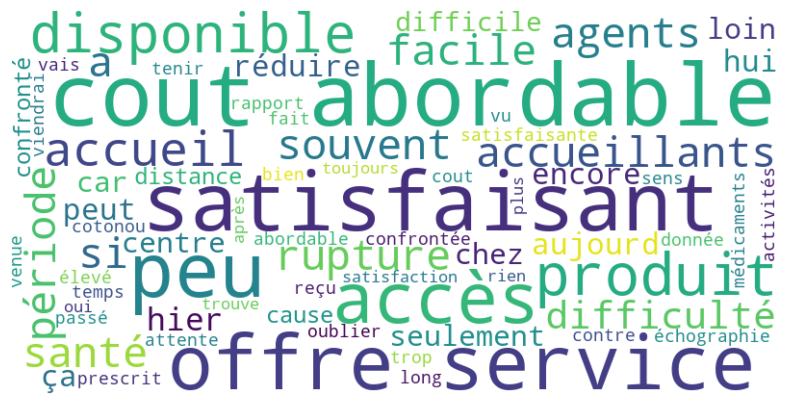

In [59]:
# Créer un nuage de mots (wordcloud).
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combiner toutes les transcriptions en une seule chaîne de texte
all_text = ' '.join([' '.join(tokens) for tokens in tokenized_texts])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Effectuer une analyse de sentiment avec NLTK.
